
### GOAL

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.



There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [128]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [129]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

import  seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



## steps
1. Data Inspection
2. EDA
3.make a modle
4.model matrix
5.model evealuation
6.making decision

#### Data Inspection

In [130]:
# Importing lead dataset
data=pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [131]:
data.shape

(9240, 37)

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [133]:
data.columns


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [134]:
data.isnull().mean()*100


Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [135]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [136]:
#dropping Lead Number and Prospect ID since they have all unique values
data.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [137]:
for i in data.columns:
        if data[i].nunique()==1:
            data.drop(i,axis=1,inplace=True)

In [138]:
# replacing select with na as many customer has not selected the field 
data=data.replace('Select', np.nan)

In [139]:
data['Lead Source']=data['Lead Source'].replace('google', 'Google')

In [140]:
data.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

Dropping columns where null content is very high>40%

In [141]:
null_col_drop= [col for col in data.columns if data[col].isnull().mean()*100>40]
null_col_drop

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [142]:
data.drop(columns=null_col_drop,axis=1,inplace=True)

In [143]:
data.shape## verify row remains same only col got reduce

(9240, 23)

In [144]:
# Rechecking the null
100*data.isnull().mean().sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Lead Origin                                       0.000000
Newspaper Article                                 0.0000

In [145]:

nul_col=[col for col in data.columns if data[col].isnull().mean()*100>20]
nul_col

['Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City']

In [146]:
for i in nul_col:
    print(i,data[i].isnull().mean()*100)
    print('*'*50)
    print(data[i].value_counts())
    print('*'*50)

Country 26.634199134199132
**************************************************
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                

#### Impute the Missing values


In [147]:
for i in nul_col:
    print(data.groupby(by=i)['Converted'].mean().sort_values())

Country
Malaysia                0.000000
Liberia                 0.000000
Kuwait                  0.000000
Kenya                   0.000000
Italy                   0.000000
Indonesia               0.000000
Philippines             0.000000
Ghana                   0.000000
Vietnam                 0.000000
Russia                  0.000000
Sri Lanka               0.000000
China                   0.000000
Canada                  0.000000
Belgium                 0.000000
Switzerland             0.000000
Tanzania                0.000000
Uganda                  0.000000
Nigeria                 0.000000
Qatar                   0.100000
Saudi Arabia            0.190476
unknown                 0.200000
Australia               0.230769
Germany                 0.250000
South Africa            0.250000
United States           0.260870
Sweden                  0.333333
United Kingdom          0.333333
India                   0.369840
United Arab Emirates    0.377358
Singapore               0.458333
Om

In [148]:
#Specialization,Lead Source,
# creating other category as it is an important and have 
#very high value just not deletig as it will be in mind

In [149]:
for i in nul_col:
    data[i].fillna(i+'_missing',inplace=True)

In [150]:
data.isnull().mean()*100

Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper                                        0.000000
Digital Advert

In [151]:
nul_col=[col for col in data.columns if data[col].isnull().mean()>0]
nul_col

['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity']

In [152]:
for i in nul_col:
    print(data[i].describe())

count       9204
unique        20
top       Google
freq        2873
Name: Lead Source, dtype: object
count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64
count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64
count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object


In [153]:
for i in nul_col:
    if data[i].dtype=='object':
        Mode_value=data[i].mode()[0]
        #print(i,Mode_value)
        data[i]=data[i].fillna(Mode_value,axis=0)
    else:
        Median_value=data[i].median()
        #print(i,Median_value)
        data[i]=data[i].fillna(Median_value,axis=0)

In [154]:
data.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Tags                           

### Univariate Analysis

In [155]:
###categorical variables
cat_col=[col for col in data.columns if data[col].dtype=='object']
cat_col


['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [156]:
#continous Numerical Varaiable
cont_col=[col for col in data.columns if data[col].dtype!='object']
cont_col

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64


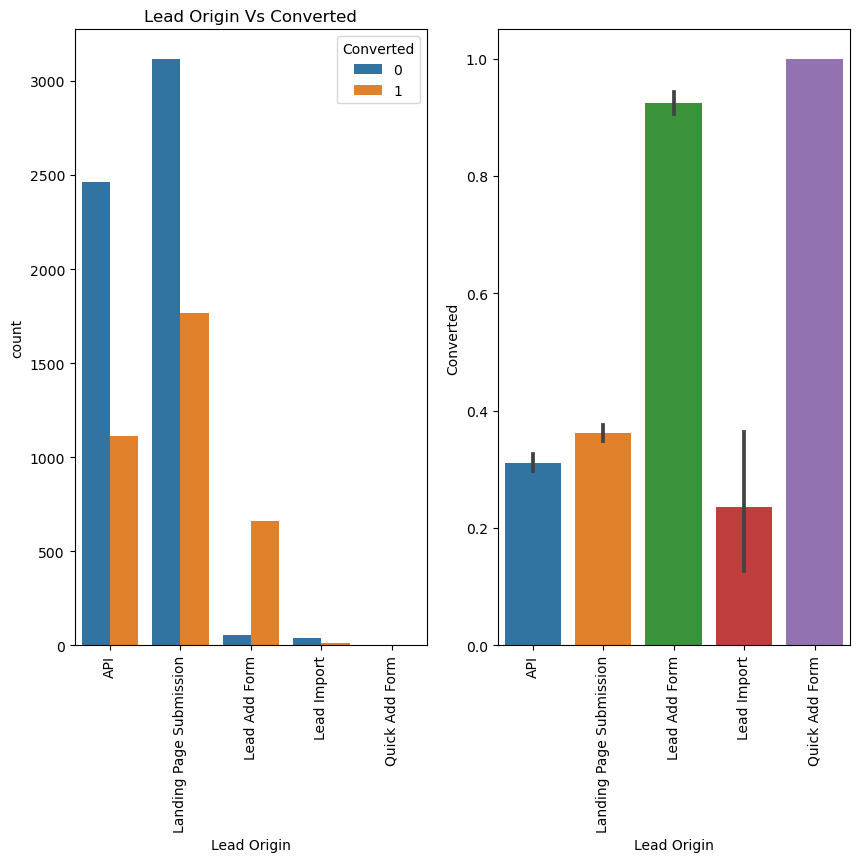

Google               0.314827
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
Click2call           0.000433
Social Media         0.000216
Live Chat            0.000216
Press_Release        0.000216
Pay per Click Ads    0.000108
blog                 0.000108
WeLearn              0.000108
welearnblog_Home     0.000108
youtubechannel       0.000108
testone              0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64


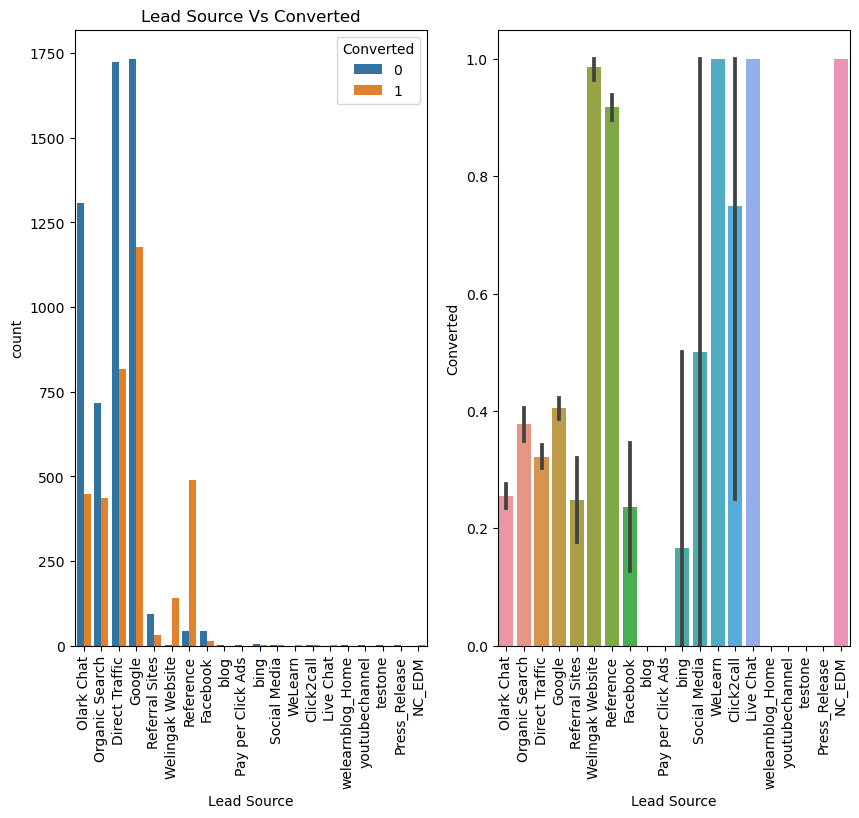

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64


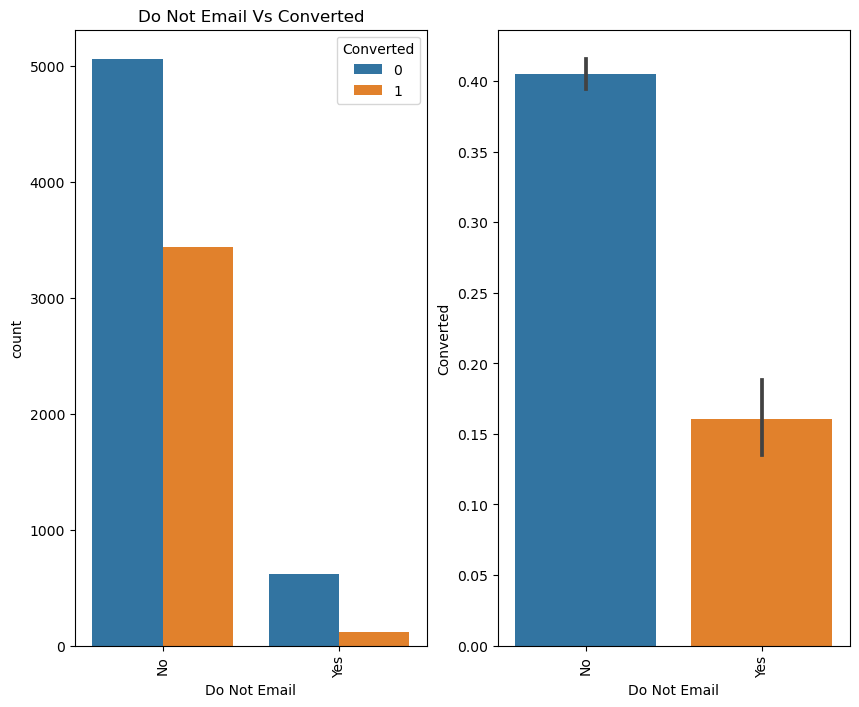

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64


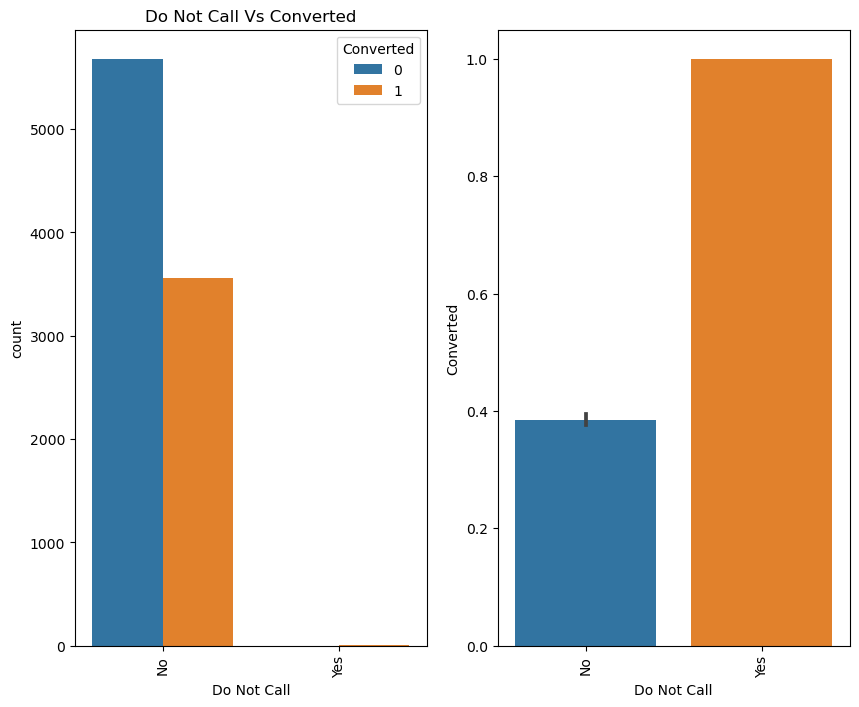

Email Opened                    0.383117
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64


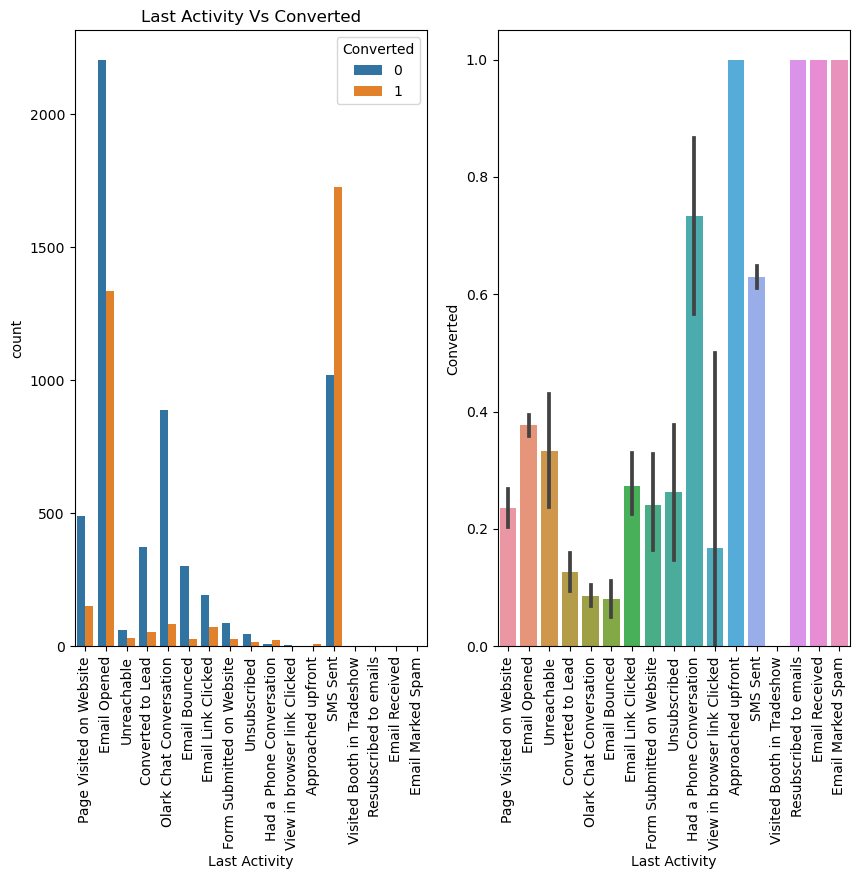

India                   0.702597
Country_missing         0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

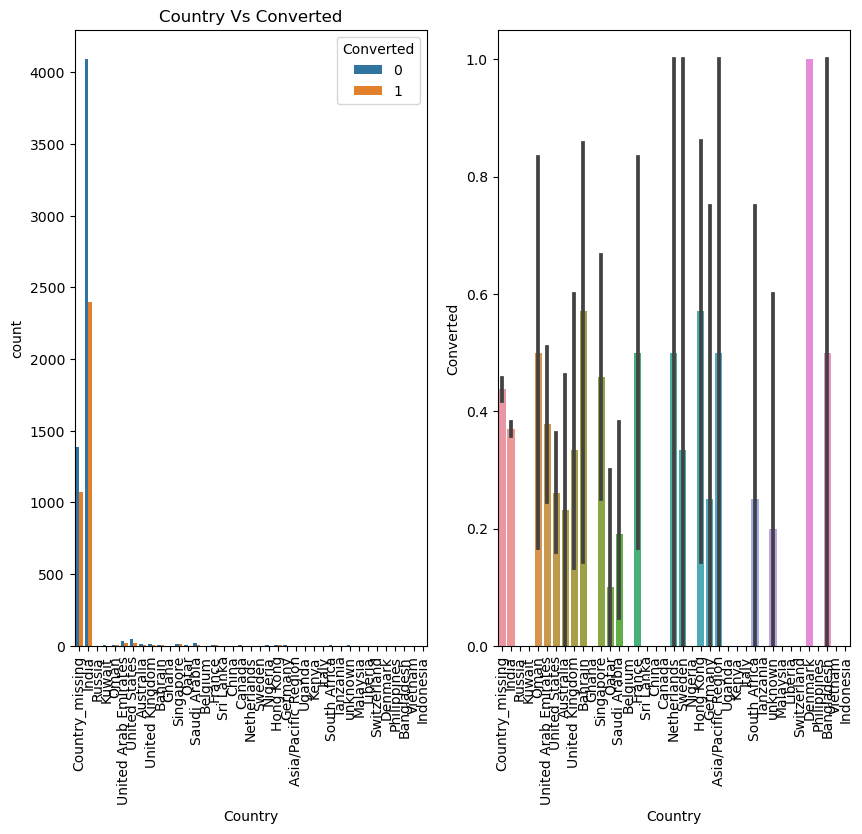

Specialization_missing               0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64


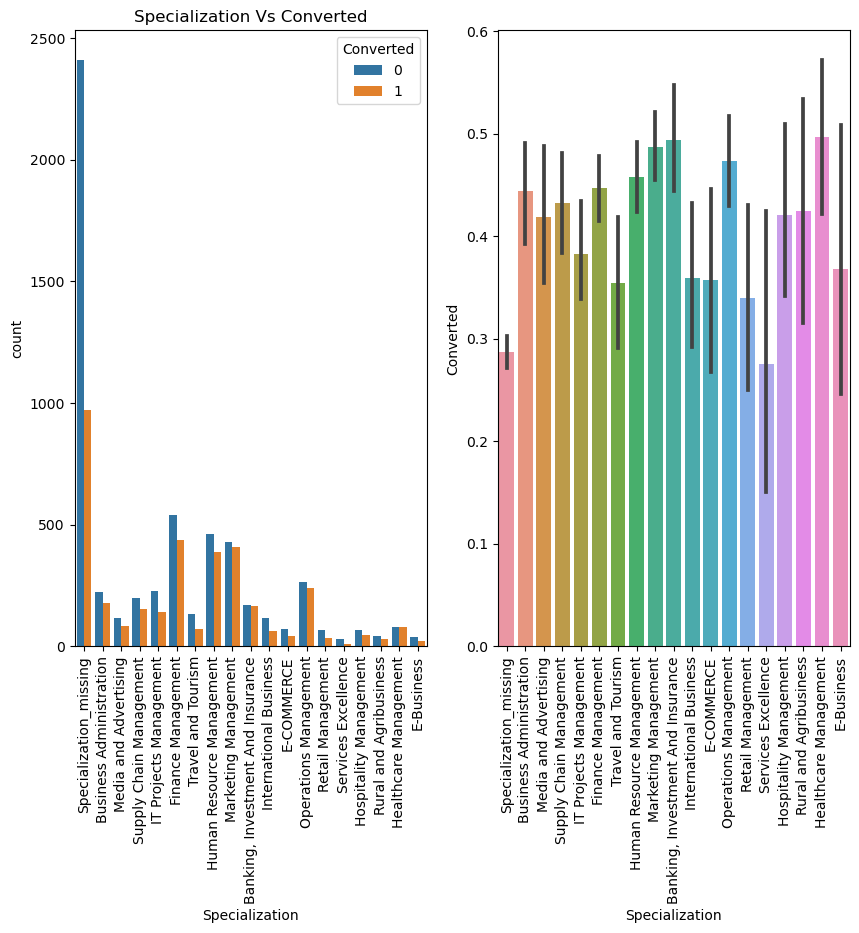

Unemployed                                 0.606061
What is your current occupation_missing    0.291126
Working Professional                       0.076407
Student                                    0.022727
Other                                      0.001732
Housewife                                  0.001082
Businessman                                0.000866
Name: What is your current occupation, dtype: float64


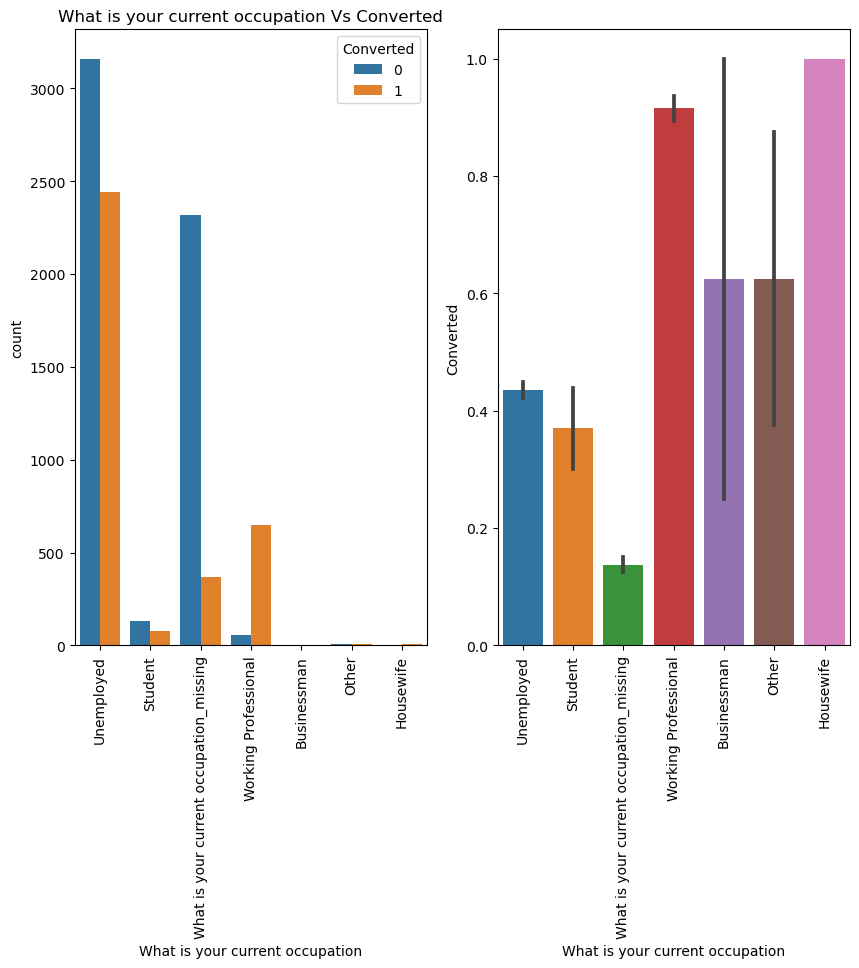

Better Career Prospects                                  0.706494
What matters most to you in choosing a course_missing    0.293182
Flexibility & Convenience                                0.000216
Other                                                    0.000108
Name: What matters most to you in choosing a course, dtype: float64


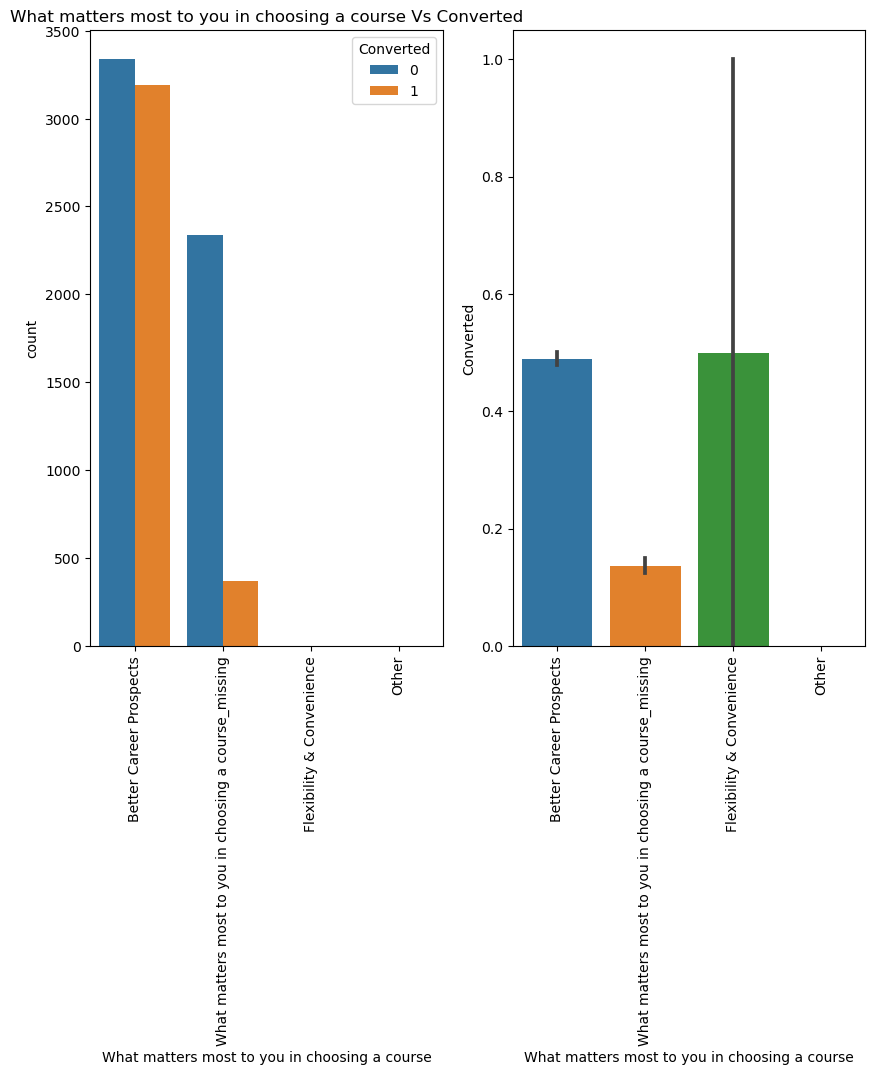

No     0.998485
Yes    0.001515
Name: Search, dtype: float64


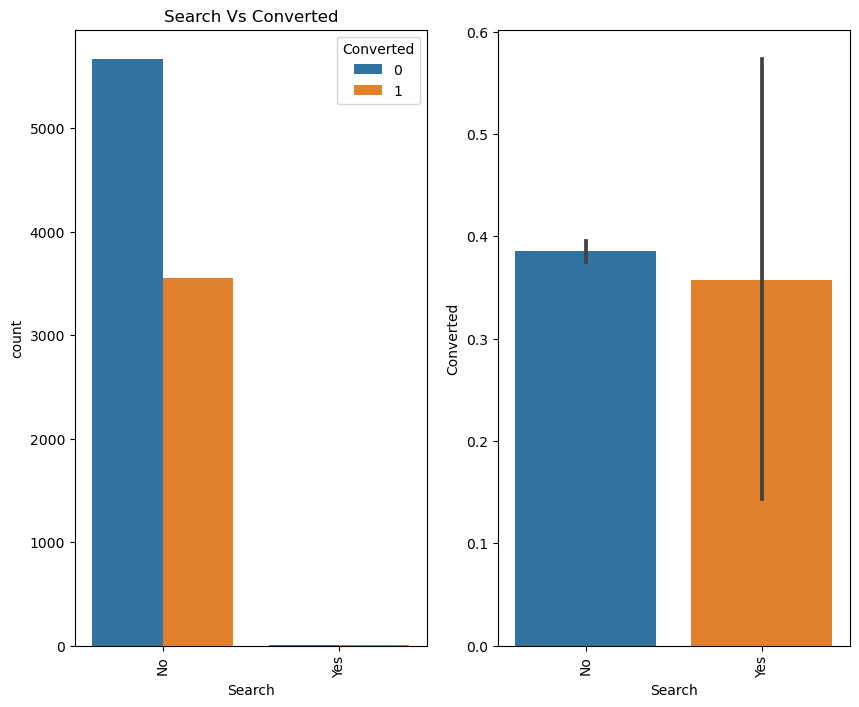

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64


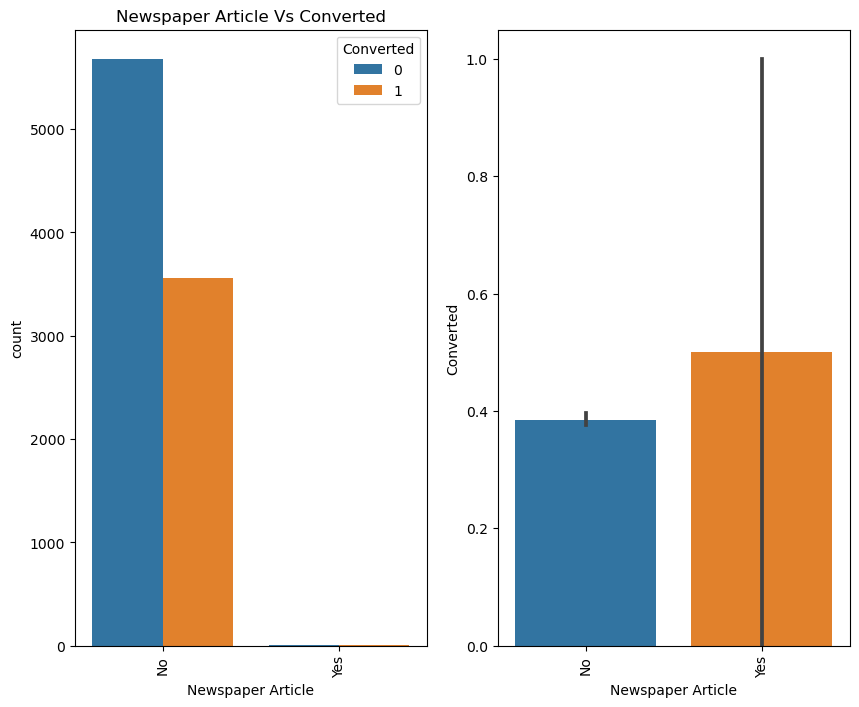

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64


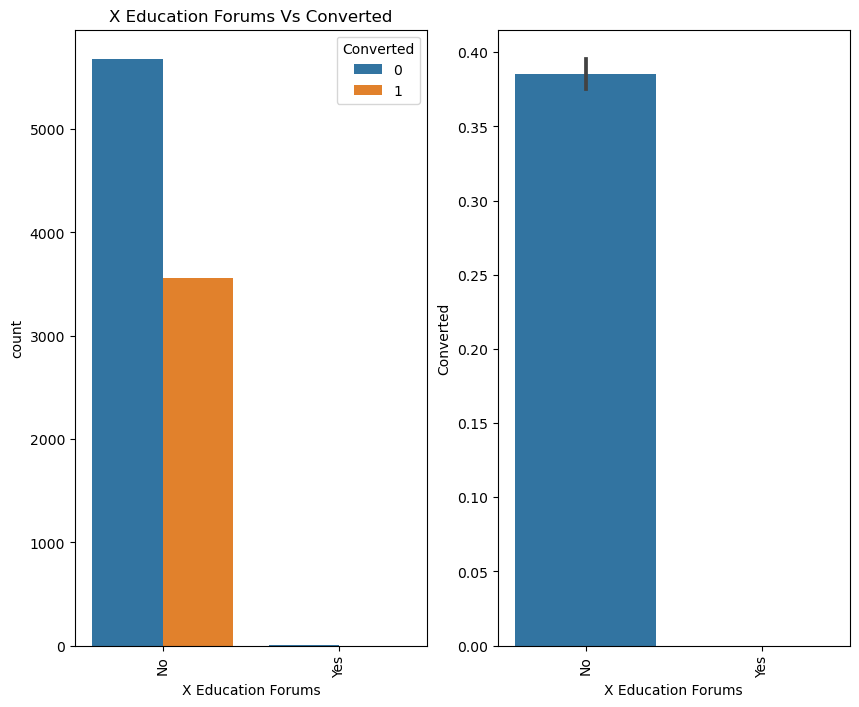

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64


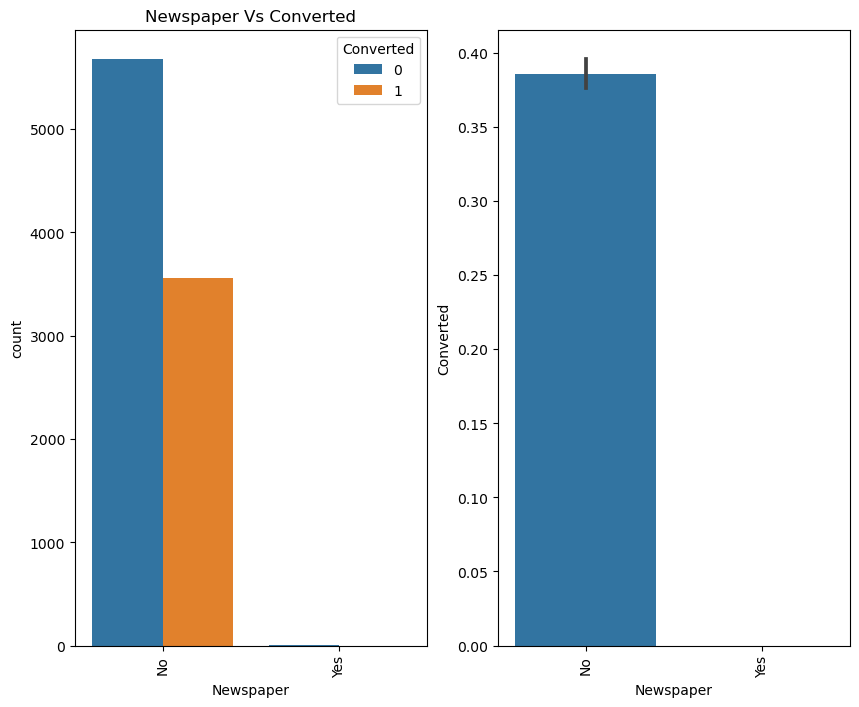

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64


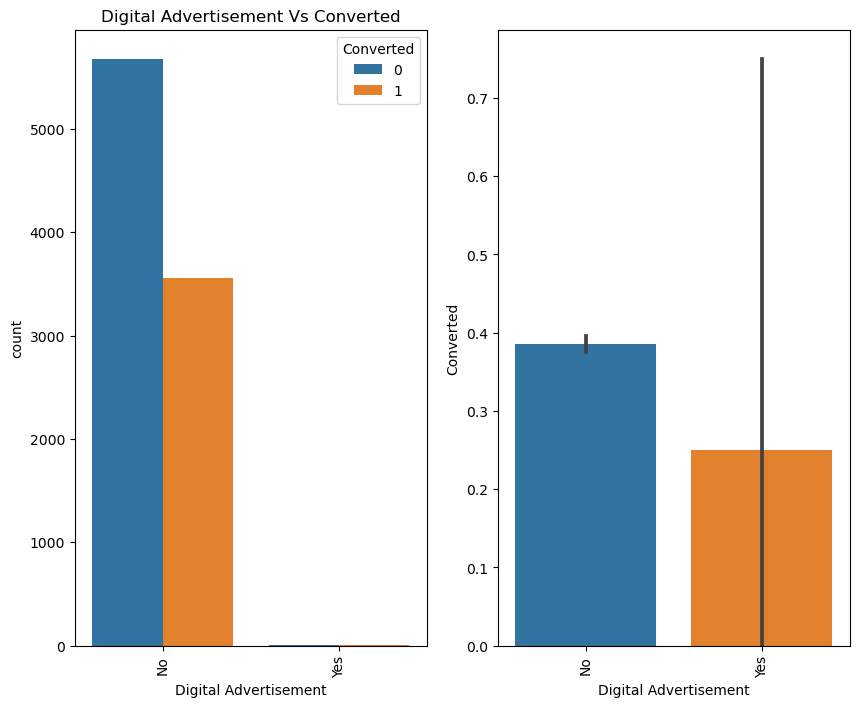

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64


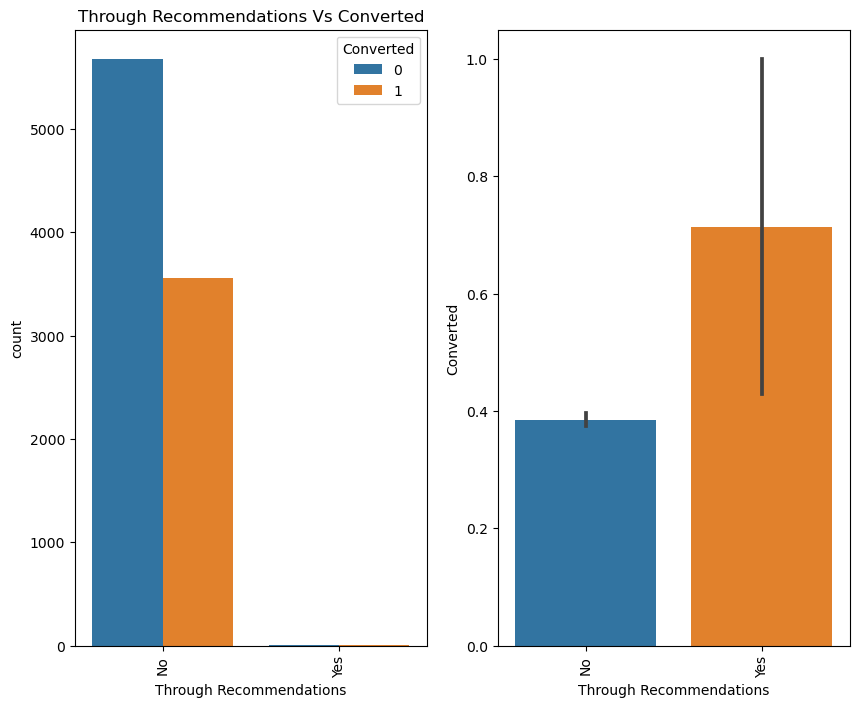

Tags_missing                                         0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

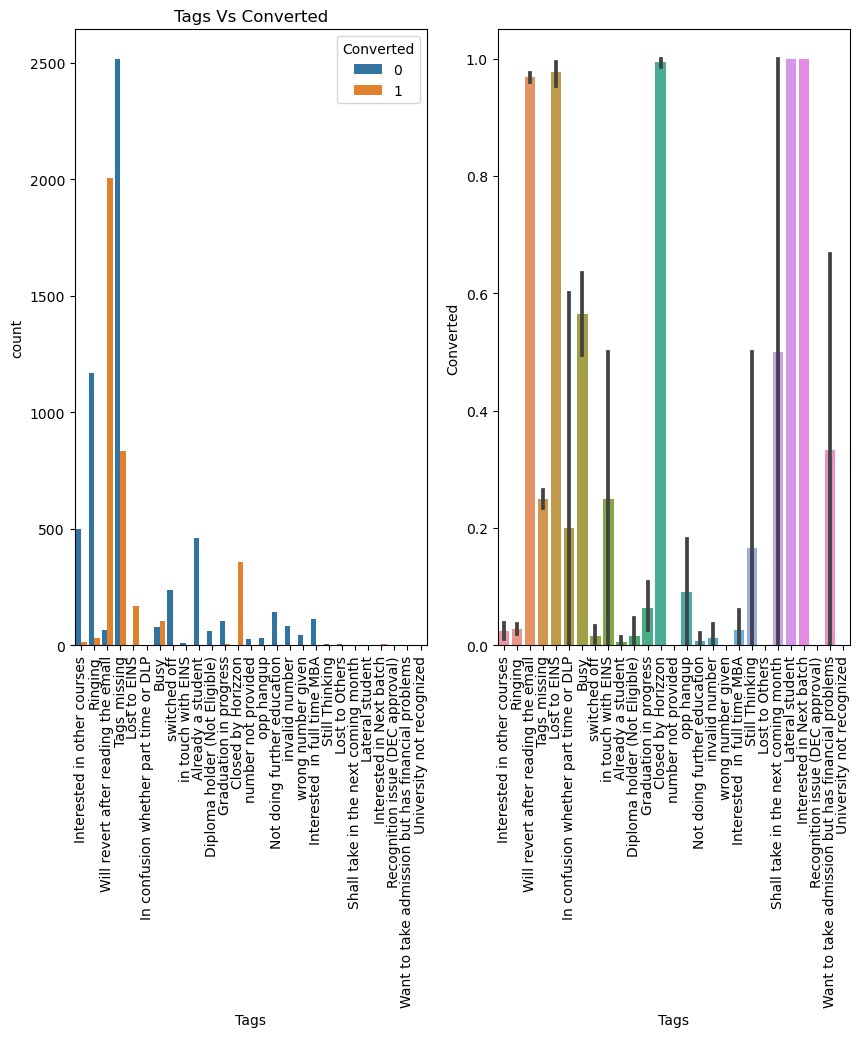

City_missing                   0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64


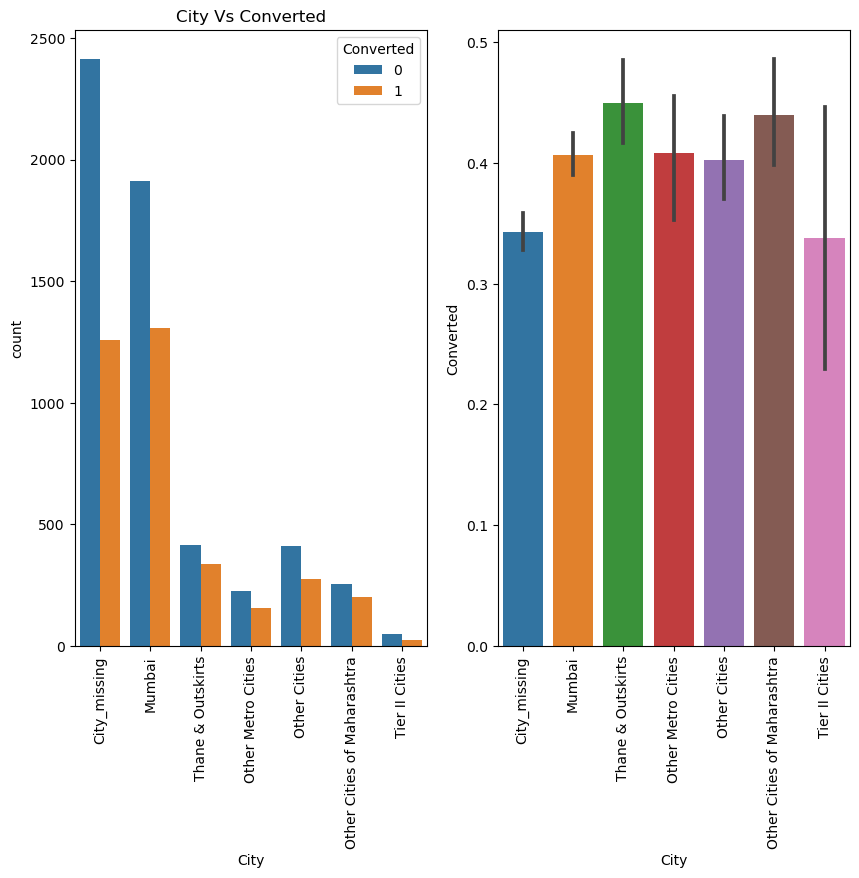

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64


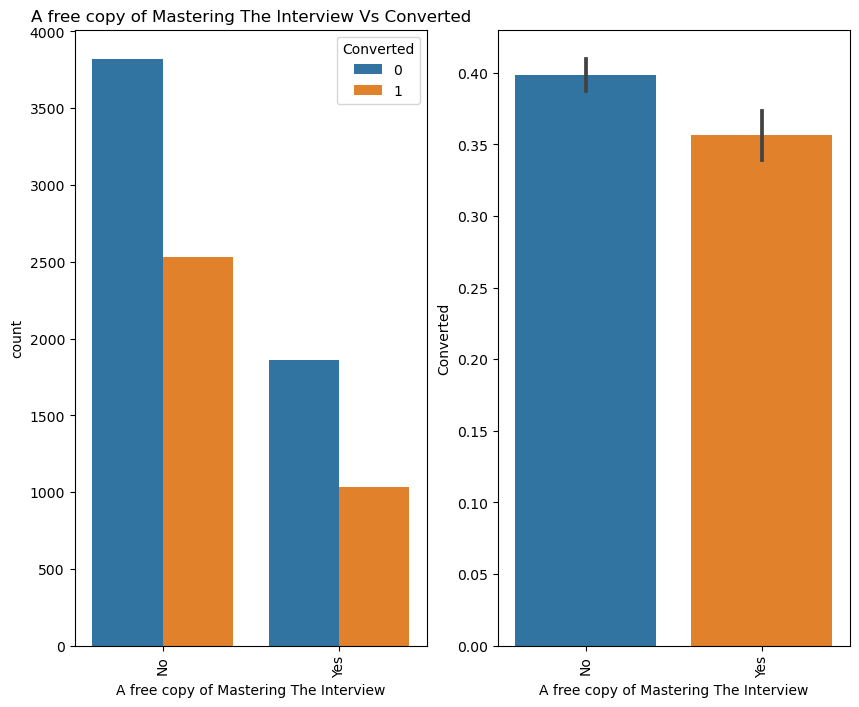

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: Last Notable Activity, dtype: float64


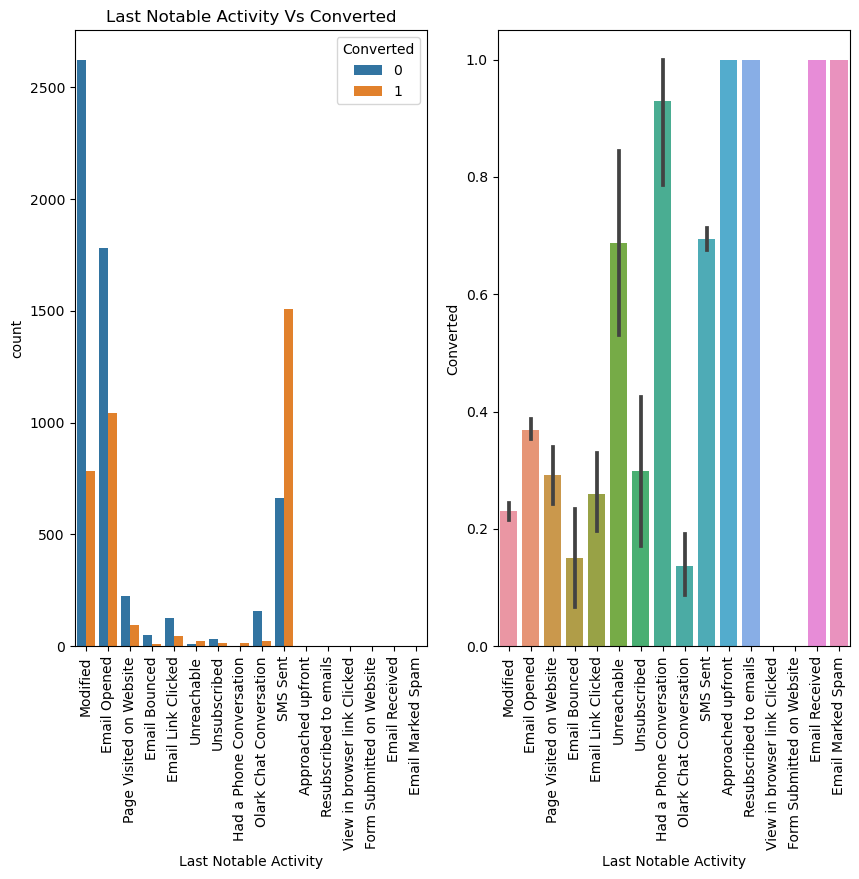

In [157]:

for x in cat_col:
    if x!='Converted':
        
    
        plt.figure(figsize=[10,8])
        plt.subplot(1,2,1)
        sns.countplot(data=data,x=x,hue='Converted')
        plt.title(x+' Vs Converted')
        #plt.label()
        plt.xticks(rotation=90)
        
        print(data[x].value_counts(normalize=True))

        plt.subplot(1,2,2)
        sns.barplot(data=data,x=x,y='Converted')
        plt.xticks(rotation=90)
        plt.show()
        
        

##### Dropping these variable as 90 these are one categories 
Name: What matters most to you in choosing a course, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
Digital Advertisement 	Through Recommendations

Country Majority is India and also City is Mumbai. so droppingt them also 


In [158]:
x=['What matters most to you in choosing a course','Digital Advertisement','Through Recommendations','City','Do Not Call','Do Not Email','Country','Search','Newspaper Article','X Education Forums','Newspaper']
data.drop(columns=x,axis=1,inplace=True)



In [159]:
data['A free copy of Mastering The Interview']=data['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})

In [33]:
data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Specializationmissing,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Specializationmissing,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Specializationmissing,Unemployed,Will revert after reading the email,0,Modified


In [34]:
cat_col_new=[col for col in data.columns if data[col].dtype=="object" ]
cat_col_new


['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Last Notable Activity']

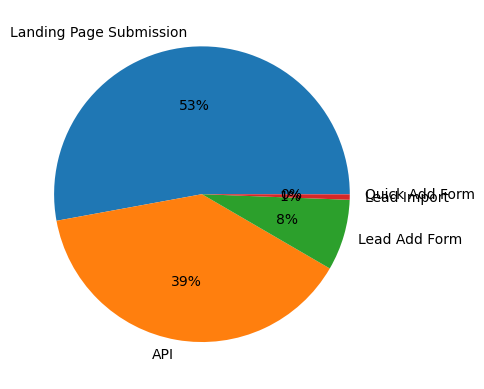

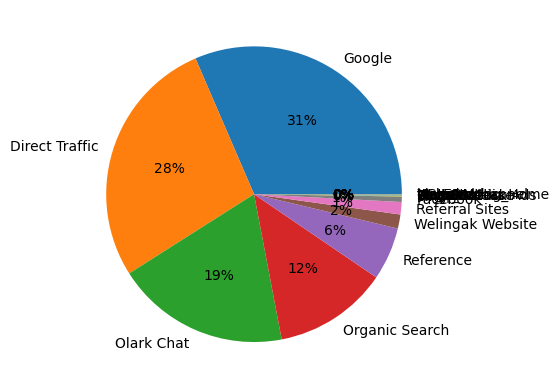

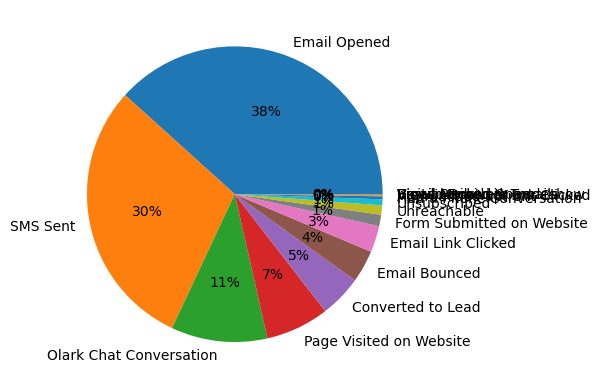

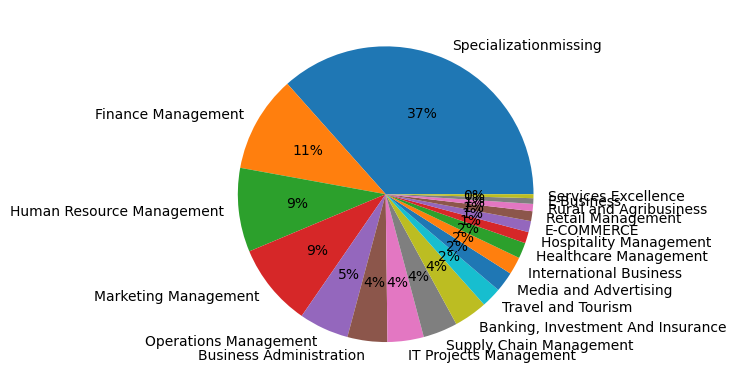

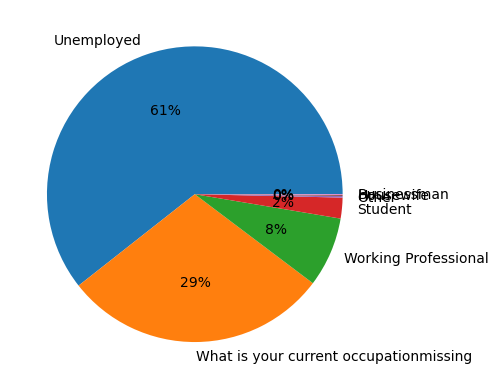

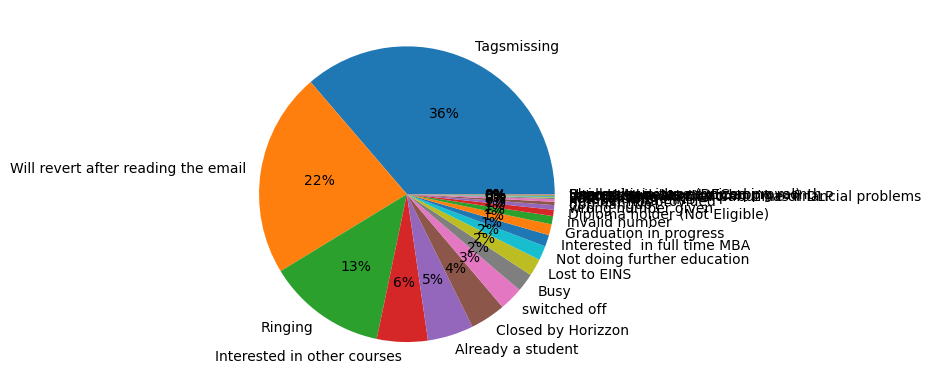

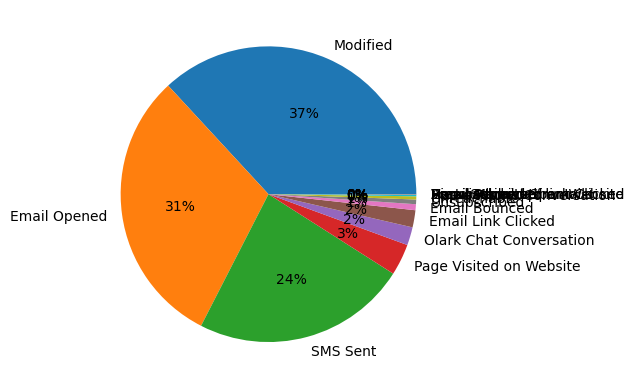

In [35]:
for i in cat_col_new:
    plt.pie(data[i].value_counts(),labels=data[i].value_counts().index,autopct = "%1.0f%%")
    plt.show()
    

In [36]:
# Assign Other categories to very low freq data
#data['Tags'].value_counts.values()
       

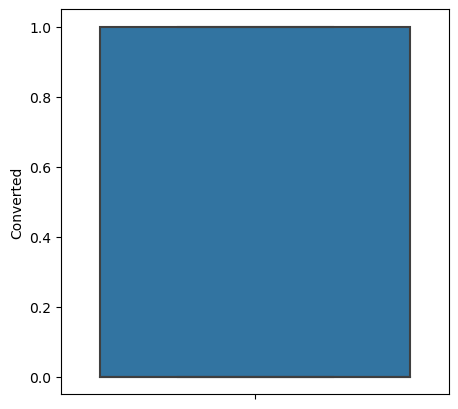

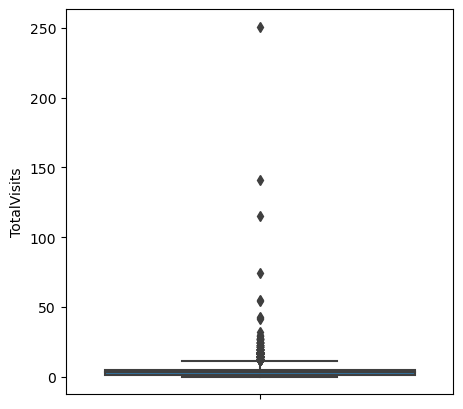

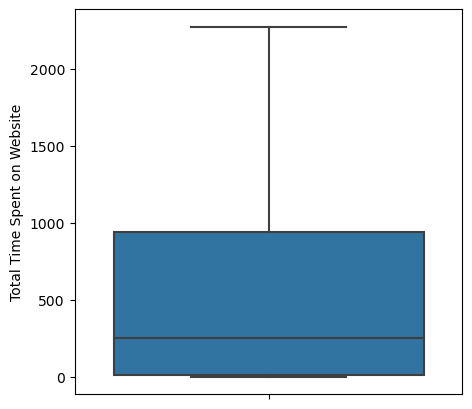

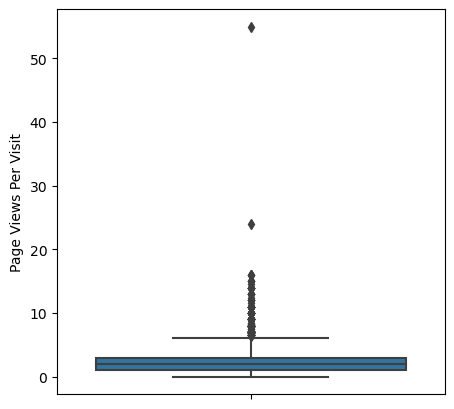

In [37]:
for i in cont_col:
    
    plt.figure(figsize = (5,5))
    sns.boxplot(y=data[i])
    plt.show()

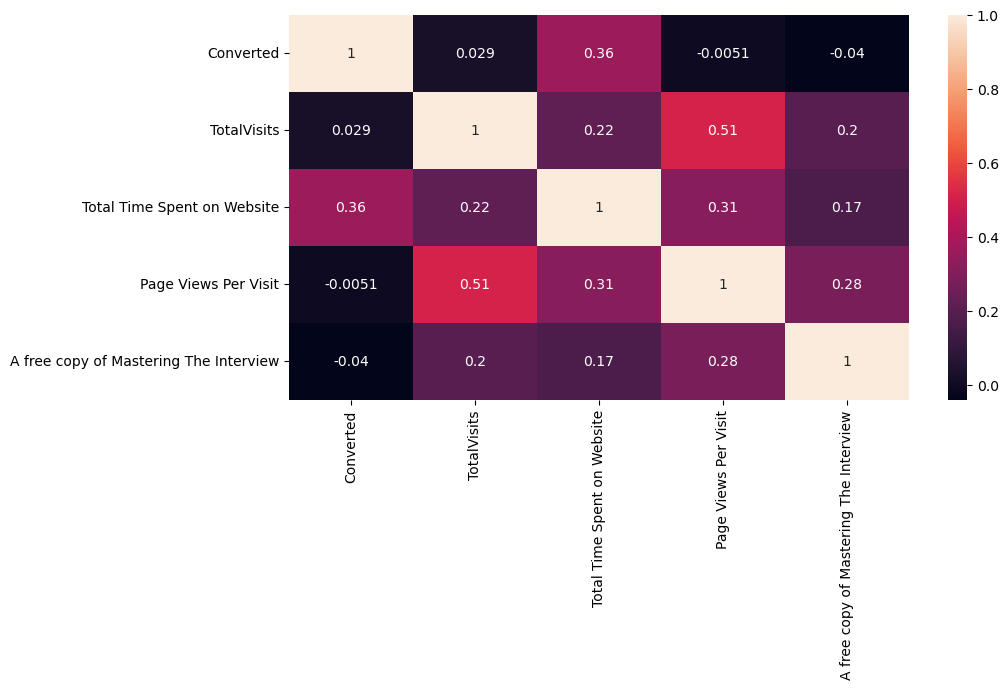

In [38]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

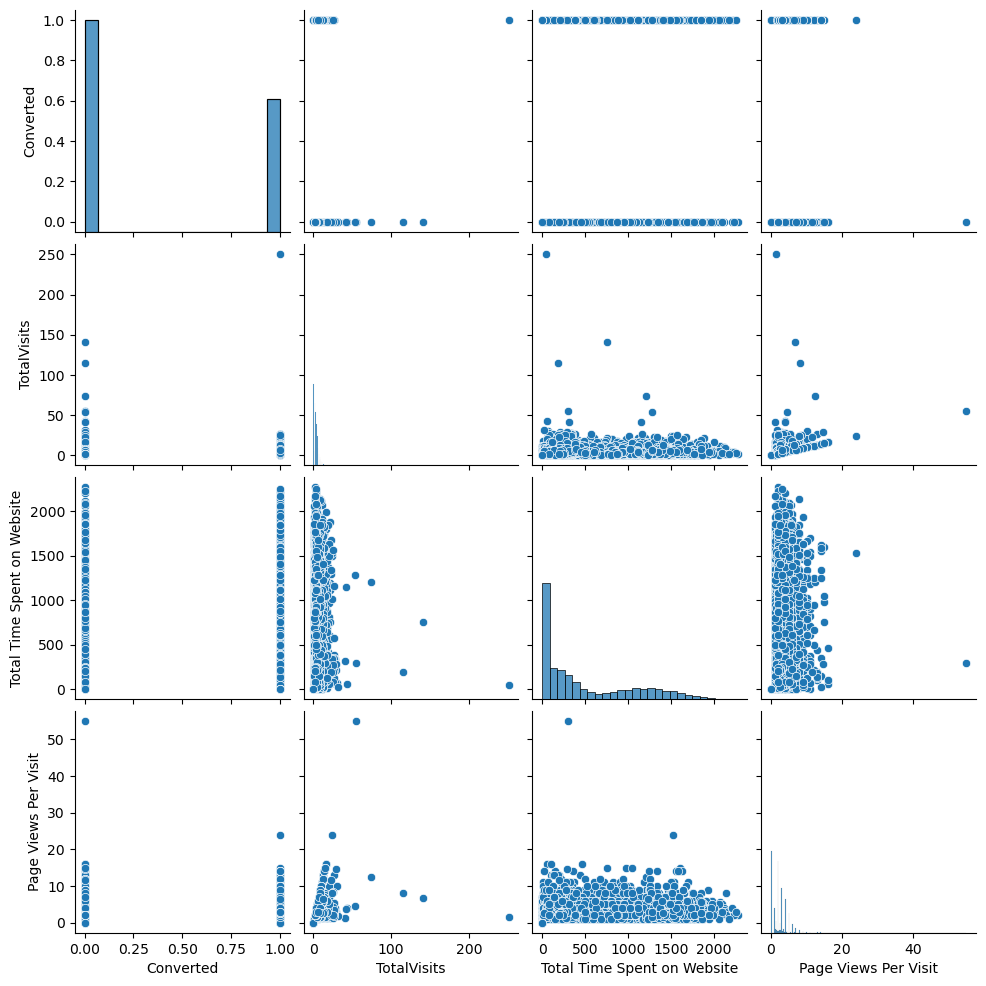

In [39]:
sns.pairplot(data[cont_col])
plt.show()

Insite Drawn:from the aboveplot total visits highcorelation with the page views per visit which is not so clear ... due to outlier presence so capping 


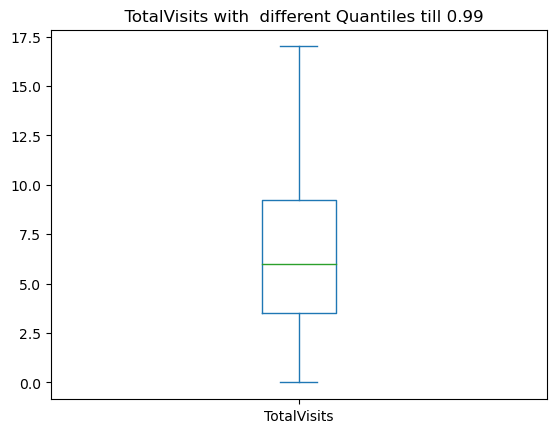

In [40]:
data['TotalVisits'].quantile([0,0.5,0.75,0.90,0.95,0.99]).plot.box()
plt.title('  TotalVisits with  different Quantiles till 0.99')

plt.show()

In [41]:
def Capping_Outliers(i,df):## one way to deal with OUTLIER is to CAP created function to capping  to IQR the outlier 

    q1=df[i].describe()['25%']
    q3=df[i].describe()['75%']
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    df[i]=np.where(df[i]<lb,lb,df[i])
    df[i]=np.where(df[i]>ub,ub,df[i])
    return df[i]


In [42]:
Capping_Outliers('TotalVisits',data)
data.TotalVisits.describe()

count    9240.000000
mean        3.217424
std         2.860471
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        11.000000
Name: TotalVisits, dtype: float64

In [43]:
data['TotalVisits'].value_counts()

0.0     2189
2.0     1680
3.0     1443
4.0     1120
5.0      783
6.0      466
1.0      395
11.0     353
7.0      309
8.0      224
9.0      164
10.0     114
Name: TotalVisits, dtype: int64

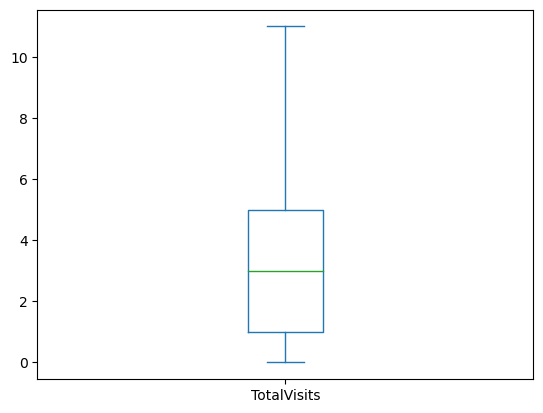

In [44]:
data['TotalVisits'].plot.box()
plt.show()

In [45]:
Capping_Outliers('Page Views Per Visit',data)
data['Page Views Per Visit'].describe()

count    9240.000000
mean        2.255105
std         1.779471
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Page Views Per Visit, dtype: float64

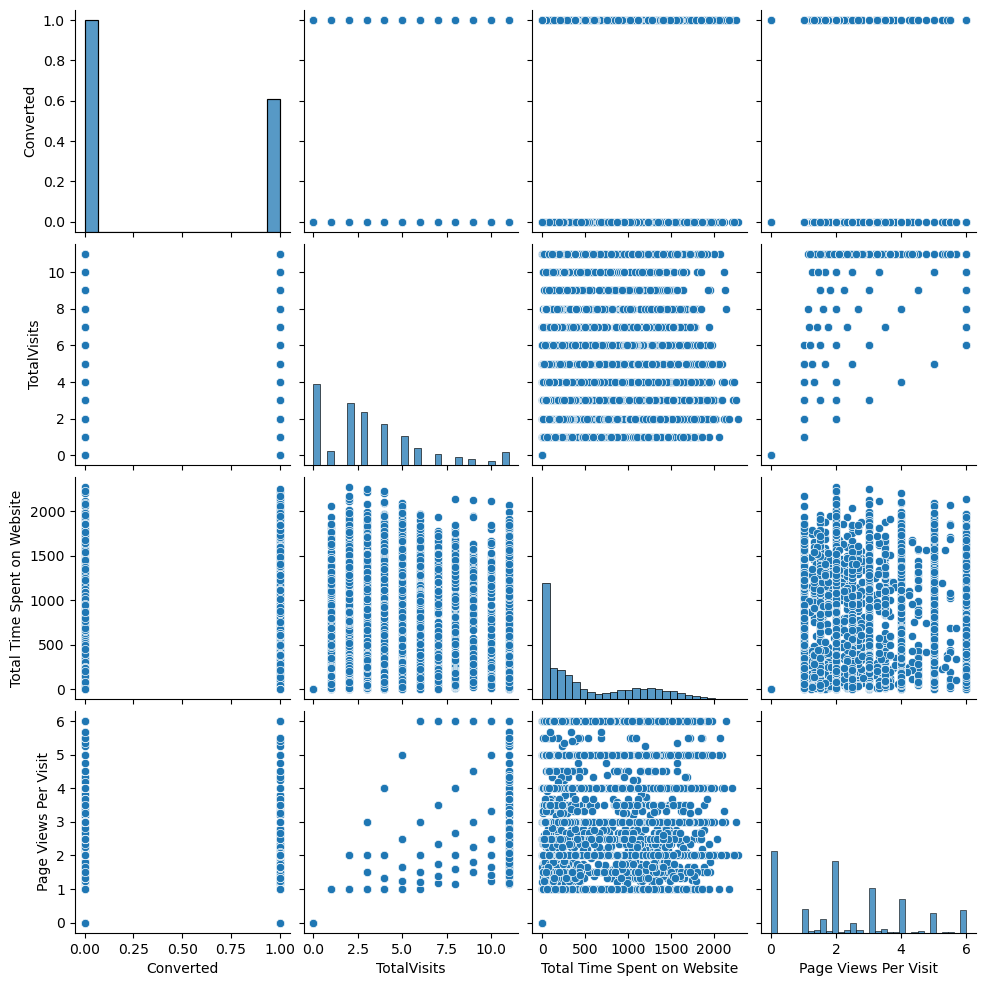

In [46]:
sns.pairplot(data[cont_col])
plt.show()

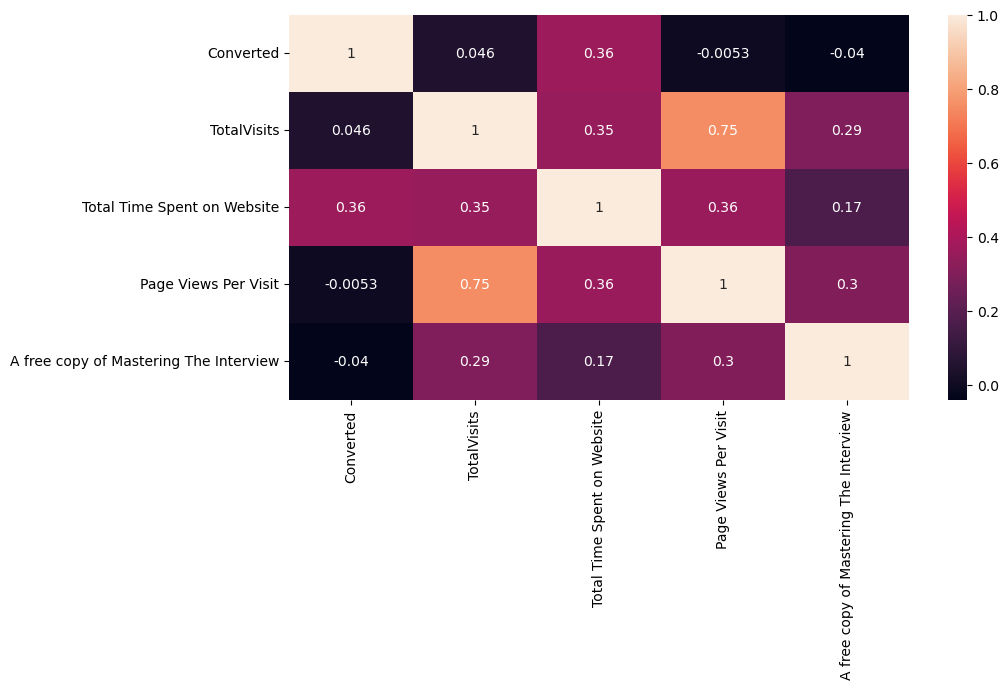

(9240, 12)

In [47]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.show()
data.shape

Preprocessing the Data Fraem for Building Model

In [48]:
data.head()
#data.shape


,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Specializationmissing,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Specializationmissing,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Specializationmissing,Unemployed,Will revert after reading the email,0,Modified


Dummy Varaible creation

In [49]:
col_dummy=[col for col in data.columns if data[col].dtype=='object' if data[col].nunique()>2 ]
col_dummy


['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Last Notable Activity']

dummies = pd.get_dummies(data['Specialization'])#,drop_first =True)
print(dummies)
#print('*'*40)
#data=pd.concat([data,dummies],axis=1)

In [50]:
for i in col_dummy:
    
    dummies = pd.get_dummies(data[i],drop_first =True)
    #print(dummies)
    #print('*'*40)
    data=pd.concat([data,dummies],axis=1)

In [51]:
data.drop(col_dummy,axis=1,inplace=True)

In [52]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Direct Traffic,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [53]:
for i in data.columns:
    print(i)

Converted
TotalVisits
Total Time Spent on Website
Page Views Per Visit
A free copy of Mastering The Interview
Landing Page Submission
Lead Add Form
Lead Import
Quick Add Form
Direct Traffic
Facebook
Google
Live Chat
NC_EDM
Olark Chat
Organic Search
Pay per Click Ads
Press_Release
Reference
Referral Sites
Social Media
WeLearn
Welingak Website
bing
blog
testone
welearnblog_Home
youtubechannel
Converted to Lead
Email Bounced
Email Link Clicked
Email Marked Spam
Email Opened
Email Received
Form Submitted on Website
Had a Phone Conversation
Olark Chat Conversation
Page Visited on Website
Resubscribed to emails
SMS Sent
Unreachable
Unsubscribed
View in browser link Clicked
Visited Booth in Tradeshow
Business Administration
E-Business
E-COMMERCE
Finance Management
Healthcare Management
Hospitality Management
Human Resource Management
IT Projects Management
International Business
Marketing Management
Media and Advertising
Operations Management
Retail Management
Rural and Agribusiness
Services 

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm # for summarry

Scaling the continous variable

In [99]:
y=data.pop('Converted')
X=data

KeyError: 'Converted'

In [100]:
cont_col=['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [102]:
X_train.shape

(6468, 108)

In [103]:
Scaler=MinMaxScaler()

In [104]:
X_train[cont_col]=Scaler.fit_transform(X_train[cont_col])

In [106]:
X_test[cont_col]=Scaler.transform(X_test[cont_col])

In [107]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Direct Traffic,Facebook,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
1871,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.363636,0.214349,0.221667,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.454545,0.046655,0.416667,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.454545,0.541373,0.833333,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Model

In [108]:
model1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6364
Model Family:                Binomial   Df Model:                          103
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 17 Mar 2023   Deviance:                       71104.
Time:                        12:41:17   Pearson chi2:                 3.48e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                             -1.135e+14   5.41e+07   -2.1e+06      0.000   -1.13e+14   -1.13e+14
TotalVisits                                        4.467e+14   5.32e+06    8.4e+07      0.000    4.47e+14    4.47e+14
Total Time Spent on Website                        1.588e+15   4.21e+06   3.77e+08      0.000    1.59e+15    1.59e+15
Page Views Per Visit                              -5.298e+14    5.2e+06  -1.02e+08      0.000    -5.3e+14    -5.3e+14
A free copy of Mastering The Interview            -8.205e+13   2.68e+06  -3.06e+07      0.000    -8.2e+13    -8.2e+13
Landing Page Submission                           -1.825e+14   3.41e+06  -5.34e+07      0.000   -1.82e+14   -1.82e+14
Lead Add Form                                      2.113e+14   1.31e+07   1.62e+07      0.000    2.11e+14    2.11e+14
Lead Import                                          1.3e+15   4.88e+07   2.67e+07      0.000     1.3e+15     1.3e+15
Quick Add Form                                      5.08e+15   6.79e+07   7.48e+07      0.000    5.08e+15    5.08e+15
Direct Traffic                                     8.689e+14   4.27e+07   2.03e+07      0.000    8.69e+14    8.69e+14
Facebook                                          -7.896e+14   6.47e+07  -1.22e+07      0.000    -7.9e+14    -7.9e+14
Google                                             9.337e+14   4.26e+07   2.19e+07      0.000    9.34e+14    9.34e+14
Live Chat                                          3.732e+15   6.26e+07   5.97e+07      0.000    3.73e+15    3.73e+15
NC_EDM                                             7.574e+14   7.96e+07   9.52e+06      0.000    7.57e+14    7.57e+14
Olark Chat                                         1.147e+15   4.28e+07   2.68e+07      0.000    1.15e+15    1.15e+15
Organic Search                                     9.782e+14   4.27e+07   2.29e+07      0.000    9.78e+14    9.78e+14
Pay per Click Ads                                 -1.773e+15   7.96e+07  -2.23e+07      0.000   -1.77e+15   -1.77e+15
Press_Release                                      -2.12e+15   6.42e+07   -3.3e+07      0.000   -2.12e+15   -2.12e+15
Reference                                          7.284e+14   4.08e+07   1.79e+07      0.000    7.28e+14    7.28e+14
Referral Sites                                     7.881e+14   4.33e+07   1.82e+07      0.000    7.88e+14    7.88e+14
Social Media                                       1.835e+15    6.4e+07   2.87e+07      0.000    1.83e+15    1.83e+15
WeLearn                                            4.197e+15   7.96e+07   5.27e+07      0.000     4.2e+15     4.2e+15
Welingak Website                                   2.412e+15   4.14e+07   5.83e+07      0.000    2.41e+15    2.41e+15
bing           

In [109]:
#Feature Elimination using RFE

In [110]:
estimator=LogisticRegression()
estimator.fit(X_train,y_train)

selector=RFE(estimator,n_features_to_select=15)
selector=selector.fit(X_train,y_train)

In [111]:
selector.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False])

In [112]:
list(zip(X_train.columns,selector.support_,selector.ranking_))

[('TotalVisits', False, 16),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('A free copy of Mastering The Interview', False, 46),
 ('Landing Page Submission', False, 33),
 ('Lead Add Form', False, 4),
 ('Lead Import', False, 42),
 ('Quick Add Form', False, 54),
 ('Direct Traffic', False, 40),
 ('Facebook', False, 32),
 ('Google', False, 45),
 ('Live Chat', False, 87),
 ('NC_EDM', False, 21),
 ('Olark Chat', False, 17),
 ('Organic Search', False, 43),
 ('Pay per Click Ads', False, 89),
 ('Press_Release', False, 70),
 ('Reference', False, 47),
 ('Referral Sites', False, 44),
 ('Social Media', False, 66),
 ('WeLearn', False, 85),
 ('Welingak Website', True, 1),
 ('bing', False, 83),
 ('blog', False, 58),
 ('testone', False, 93),
 ('welearnblog_Home', False, 65),
 ('youtubechannel', False, 60),
 ('Converted to Lead', False, 27),
 ('Email Bounced', False, 6),
 ('Email Link Clicked', False, 50),
 ('Email Marked Spam', False, 90),
 ('Email Opened', False, 5

In [113]:
col=X_train.columns[selector.support_]

In [114]:
col

Index(['Total Time Spent on Website', 'Welingak Website', 'SMS Sent',
       'What is your current occupationmissing', 'Busy', 'Closed by Horizzon',
       'Lateral student', 'Lost to EINS', 'Ringing', 'Tagsmissing',
       'Will revert after reading the email', 'invalid number', 'switched off',
       'wrong number given', 'Modified'],
      dtype='object')

In [115]:
X_train_sm=sm.add_constant(X_train[col])

In [116]:
model2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

In [117]:
m2=model2.fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1155.8
Date:                Fri, 17 Mar 2023   Deviance:                       2311.5
Time:                        12:41:24   Pearson chi2:                 1.18e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6217
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -4.0447      0.210    -19.258      0.000      -4.456      -3.633
Total Time Spent on Website                3.5352      0.230     15.379      0.000       3.085       3.986
Welingak Website                           3.2171      0.742      4.336      0.000       1.763       4.671
SMS Sent                                   1.7408      0.228      7.637      0.000       1.294       2.187
SMS Sent                                   0.5608      0.264      2.125      0.034       0.044       1.078
What is your current occupationmissing    -2.5914      0.155    -16.761      0.000      -2.894      -2.288
Busy                                       2.0655      0.293      7.061      0.000       1.492       2.639
Closed by Horizzon                         9.6513      1.028      9.392      0.000       7.637      11.665
Lateral student                           26.4531   4.42e+04      0.001      1.000   -8.67e+04    8.67e+04
Lost to EINS                               9.3975      0.784     11.984      0.000       7.861      10.935
Ringing                                   -1.7430      0.296     -5.880      0.000      -2.324      -1.162
Tagsmissing                                3.7018      0.227     16.308      0.000       3.257       4.147
Will revert after reading the email        6.3923      0.250     25.556      0.000       5.902       6.883
invalid number                            -2.3401      1.112     -2.104      0.035      -4.520      -0.160
switched off                              -1.9833      0.558     -3.555      0.000      -3.077      -0.890
wrong number given                       -21.4797   1.25e+04     -0.002      0.999   -2.46e+04    2.46e+04
Modified                                  -1.3390      0.158     -8.495      0.000      -1.648      -1.030
==========================================================================================================
"""

In [118]:
y_train_predict=m2.predict(X_train_sm)

In [119]:
y_train_predict

1871    0.003056
6795    0.602267
3516    0.003602
8105    0.171907
3934    0.156856
          ...   
350     0.912746
79      0.891450
8039    0.415118
6936    0.006605
5640    0.013745
Length: 6468, dtype: float64

In [120]:
y_train_predict=y_train_predict.values.reshape(-1)


In [121]:
y_train_predict

array([0.0030559 , 0.60226663, 0.0036019 , ..., 0.41511814, 0.006605  ,
       0.01374524])

Creating DF with actual 

In [122]:
y_train_predict_DF=pd.DataFrame({'y_train_index':y_train.index,"y_Actual":y_train.values,"y_predict_prob":y_train_predict})


In [123]:
y_train_predict_DF

,y_train_index,y_Actual,y_predict_prob
0,1871,0,0.003056
1,6795,0,0.602267
2,3516,0,0.003602
3,8105,0,0.171907
4,3934,0,0.156856
...,...,...,...
6463,350,1,0.912746
6464,79,1,0.891450
6465,8039,1,0.415118
6466,6936,0,0.006605


In [125]:
y_train_predict_DF['y_predict']=y_train_predict_DF['y_predict_prob'].map(lambda x:1 if x>0.5 else 0)

In [126]:
y_train_predict_DF

,y_train_index,y_Actual,y_predict_prob,y_predict
0,1871,0,0.003056,0
1,6795,0,0.602267,1
2,3516,0,0.003602,0
3,8105,0,0.171907,0
4,3934,0,0.156856,0
...,...,...,...,...
6463,350,1,0.912746,1
6464,79,1,0.891450,1
6465,8039,1,0.415118,0
6466,6936,0,0.006605,0


In [176]:
from sklearn import metrics


In [177]:
confusion_metrics=metrics.confusion_matrix(y_train_predict_DF.y_Actual,y_train_predict_DF.y_predict)

In [178]:
confusion_metrics

array([[3850,  152],
       [ 273, 2193]], dtype=int64)

In [180]:
accuracy=metrics.accuracy_score(y_train_predict_DF.y_Actual,y_train_predict_DF.y_predict)
accuracy

0.9342918985776129

Manual feature elimination

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [182]:
def cal_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [183]:
cal_VIF(X_train[col])

,Features,VIF
3,SMS Sent,6.08
2,SMS Sent,5.85
10,Tagsmissing,5.25
4,What is your current occupationmissing,4.69
0,Total Time Spent on Website,1.87
11,Will revert after reading the email,1.78
15,Modified,1.71
9,Ringing,1.20
1,Welingak Website,1.13
6,Closed by Horizzon,1.12
